# EP01 - ...

## INTRODUÇÃO

In [1]:
import base64
import io
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import urllib

from math import sqrt

from IPython.display import clear_output
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 12})

def avg(ls):
    r = [0] * len(ls[0])
    
    for i in range(len(ls)):
        for j in range(len(ls[i])):
            r[j] += ls[i][j] / len(ls)
            
    return r

## MÉTODO

In [2]:
c = dict()
c["M"] = (0, 0, 0)
c["V"] = (1, 0, 0)
c["B"] = (0, 1, 0)
c["E"] = (0, 0, 1)

m = dict()

d = dict()
d["U"] = dict()
d["A"] = dict()

### MRU

In [3]:
def ulm_v(s, t):
    s = [0] + s
    t = [0] + t
    return (s[-1] - s[0])/(t[-1] - t[0])

m["U"] = dict()

m["U"]["v"] = 0.5 / 0.625
m["U"]["t"] = [step/1.6          for step in range(1, 60+1)]
m["U"]["s"] = [m["U"]["v"]*t     for t in m["U"]["t"]]

### MRUV

In [4]:
def ualm_v(s, t):
    v = [0] * len(s)

    s = [0] + s
    t = [0] + t
    for i in range(1, len(s)):
        v[i-1] = (s[i] - s[i-1])/(t[i] - t[i-1])
    
    return v

def ualm_a(v, t):
    v = [0] + v
    t = [0] + t
    return (v[-1] - v[0])/(t[-1] - t[0])

m["A"] = dict()

m["A"]["a"] = 0.01 * (1.6**2)
m["A"]["t"] = [step/1.6          for step in range(1, 77+1)]
m["A"]["v"] = [m["A"]["a"]*t     for t in m["A"]["t"]]
m["A"]["s"] = [m["A"]["a"]*t*t/2 for t in m["A"]["t"]]

## VERIFICAÇÃO

## DADOS

In [5]:
def plot_file_ios(ax, file, title):
    x, y, z, g, t = zip(*[
        tuple(line.split(sep=",")[:5])
        for line in open(file)
    ][1:])
    
    x = [float(i) for i in x][::-1]
    y = [float(i) for i in y][::-1]
    z = [float(i) for i in z][::-1]
    g = [float(i) for i in g][::-1]
    t = [float("0." + i.split(sep=".")[1]) for i in t][::-1]
    
    secs = 0
    for i in range(1, len(t)):
        if t[i] < t[i - 1]:
            secs += 1
        t[i] += secs

    xm = [0] * len(x)
    for i, xi in enumerate(x):
        xm[i] = (xm[i - 1] * i + x[i]) / (i + 1.0)
    ym = [0] * len(y)
    for i, yi in enumerate(y):
        ym[i] = (ym[i - 1] * i + y[i]) / (i + 1.0)
    zm = [0] * len(z)
    for i, zi in enumerate(z):
        zm[i] = (zm[i - 1] * i + z[i]) / (i + 1.0)
        
    ax.plot(t, x, color=(1, 0, 0, 0.2))
    ax.plot(t, y, color=(0, 1, 0, 0.2))
    ax.plot(t, z, color=(0, 0, 1, 0.2))

    ax.plot(t, xm, color=(1, 0, 0))
    ax.plot(t, ym, color=(0, 1, 0))
    ax.plot(t, zm, color=(0, 0, 1))

    ax.set_ylim([-2, 2])
    ax.set_title(title)

def plot_file_android(ax, file, title):
    t, x, y, z = zip(*[
        tuple(line.split(sep=","))
        for line in open(file)
    ][1:])
    
    x = [float(i) for i in x]
    y = [float(i) for i in y]
    z = [float(i) for i in z]
    t = [float(i) for i in t]

    xm = [0] * len(x)
    for i, xi in enumerate(x):
        xm[i] = (xm[i - 1] * i + x[i]) / (i + 1.0)
    ym = [0] * len(y)
    for i, yi in enumerate(y):
        ym[i] = (ym[i - 1] * i + y[i]) / (i + 1.0)
    zm = [0] * len(z)
    for i, zi in enumerate(z):
        zm[i] = (zm[i - 1] * i + z[i]) / (i + 1.0)
        
    ax.plot(t, x, color=(1, 0, 0, 0.2))
    ax.plot(t, y, color=(0, 1, 0, 0.2))
    ax.plot(t, z, color=(0, 0, 1, 0.2))

    ax.plot(t, xm, color=(1, 0, 0))
    ax.plot(t, ym, color=(0, 1, 0))
    ax.plot(t, zm, color=(0, 0, 1))

    ax.set_ylim([-2, 2])
    ax.set_title(title)
    
def avg_quad_err(m, o):
    return sum([(m[i] - o[i])**2/m[i] for i in range(0, len(m))]) / len(m)

def get_html_table(title, cols):
    html = "<table style=\"min-width: 300px\">"
    html += "<tr><th colspan=2>" + title + "</th></tr>"
    
    for row in range(len(cols[0])):
        html += "<tr>"
        for col in range(len(cols)):
            html += "<td style=\"border: 1px solid black; padding: 5px;\">{0}</td>".format(
                cols[col][row]
            )
        html += "</tr>"

    html += "</table>"
    return html
    
def center_html(html):
    return "<div style=\"text-align: center\">" + html + "</div>"
    
def get_html_from_plot():
    fig = plt.gcf()
    fig.set_size_inches(6, 6)
    fig.tight_layout()

    buf = io.BytesIO()
    fig.savefig(buf, format="png")
    buf.seek(0)
    string = base64.b64encode(buf.read())
    plt.clf()

    uri = "data:image/png;base64," + urllib.parse.quote(string)
    return "<img style=\"display: inline;\" src=\"%s\"/>" % uri

### MRU

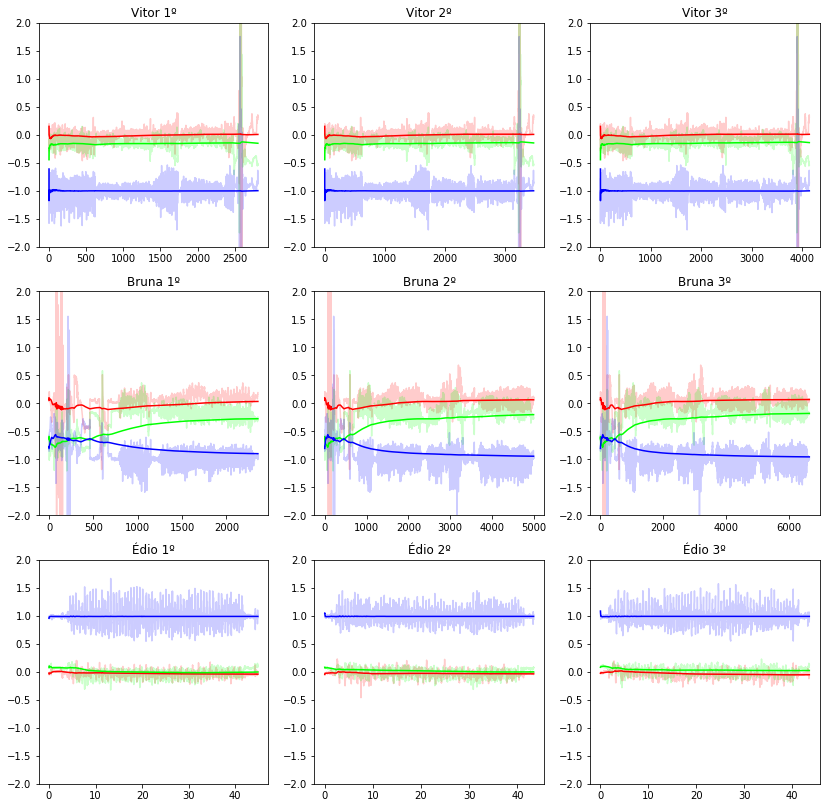

In [6]:
fig, (
    (ax11, ax12, ax13), 
    (ax21, ax22, ax23), 
    (ax31, ax32, ax33)
) = plt.subplots(3, 3, figsize=(14, 14))

plot_file_ios(ax11, "./data/mru.vitor.1.csv", "Vitor 1º")
plot_file_ios(ax12, "./data/mru.vitor.2.csv", "Vitor 2º")
plot_file_ios(ax13, "./data/mru.vitor.3.csv", "Vitor 3º")

plot_file_ios(ax21, "./data/mru.bruna.1.csv", "Bruna 1º")
plot_file_ios(ax22, "./data/mru.bruna.2.csv", "Bruna 2º")
plot_file_ios(ax23, "./data/mru.bruna.3.csv", "Bruna 3º")

plot_file_android(ax31, "./data/mru.édio.1.csv", "Édio 1º")
plot_file_android(ax32, "./data/mru.édio.2.csv", "Édio 2º")
plot_file_android(ax33, "./data/mru.édio.3.csv", "Édio 3º")

In [7]:
for per in ["V", "B", "E"]:
    d["U"][per] = dict()

    for expr in ["P1", "P2", "A1"]:
        d["U"][per][expr] = dict()

d["U"]["V"]["P1"]["s"] = [10, 20, 30]
d["U"]["V"]["P1"]["t"] = avg([[11.1, 23.4, 33.43], [11.05, 22.15, 33.79]])
d["U"]["V"]["P2"]["s"] = [10, 20, 30]
d["U"]["V"]["P2"]["t"] = avg([[11.73, 22.67, 33.6], [11.79, 22.82, 33.54]])
d["U"]["V"]["A1"]["s"] = [5, 10, 15, 20, 25, 30]
d["U"]["V"]["A1"]["t"] = [9.05, 12.3, 19.92, 25.75, 32.29, 38.51]

d["U"]["B"]["P1"]["s"] = [10, 20, 30]
d["U"]["B"]["P1"]["t"] = avg([[11.34, 21.03, 30.67], [11.21, 21.08, 30.4]])
d["U"]["B"]["P2"]["s"] = [10, 20, 30]
d["U"]["B"]["P2"]["t"] = avg([[13.39, 24.64, 36.56], [16.66, 24.52, 36.46]])
d["U"]["B"]["A1"]["s"] = [5, 10, 15, 20, 25, 30]
d["U"]["B"]["A1"]["t"] = [6.32, 11.41, 16.24, 21.19, 25.97, 30.58]

d["U"]["E"]["P1"]["s"] = [10, 20, 30]
d["U"]["E"]["P1"]["t"] = avg([[12.58, 25.63, 38.05], [12.75, 25.47, 38.37]])
d["U"]["E"]["P2"]["s"] = [10, 20, 30]
d["U"]["E"]["P2"]["t"] = avg([[13.27, 25.84, 37.91], [13.33, 25.74, 37.81]])
d["U"]["E"]["A1"]["s"] = [5, 10, 15, 20, 25, 30]
d["U"]["E"]["A1"]["t"] = [6.52, 13.42, 19.61, 25.34, 31.43, 37.57]

for per in d["U"].keys():
    for expr in d["U"][per].keys():
        d["U"][per][expr]["v"] = ulm_v(d["U"][per][expr]["s"], d["U"][per][expr]["t"])

In [8]:
exprs = ["pareado 1", "pareado 2", "alternado"]
htmls = []

for per in ["V", "B", "E"]:
    plt.axis([0, m["U"]["t"][-1]*1.1, 0, m["U"]["s"][-1]*1.1])

    plt.xlabel("t (s)")
    plt.ylabel("s(t) (m)")
    
    plt.plot(m["U"]["t"], m["U"]["s"], color=c["M"]+(0.5,), linestyle="--")

    for expr in ["P1", "P2", "A1"]:
        plt.plot(
            d["U"][per][expr]["t"], d["U"][per][expr]["s"], 
            color=c[per], linestyle="", marker="o"#, marker="$"+expr+"$", markersize=15
        )
        plt.plot(
            m["U"]["t"], [d["U"][per][expr]["v"]*t for t in m["U"]["t"]], 
            color=c[per]+(0.2,)
        )
    
    htmls.append(center_html(
        get_html_from_plot() + 
        "<div style=\"vertical-align: middle; display: flex; flex-direction: row; " +
        "justify-content: space-around; vertical-align: middle;\">" +
        get_html_table(
            "Velocidade média na passada (m/s)", 
            [exprs, [d["U"][per][expr]["v"] for expr in d["U"][per]]]
        ) + 
        get_html_table(
            "E.Q.M.s dos cronômetros à vm (%)", 
            [exprs, [
                avg_quad_err(
                    [s/d["U"][per][expr]["v"] for s in d["U"][per][expr]["s"]],
                    [t for t in d["U"][per][expr]["t"]]
                ) for expr in d["U"][per].keys()
            ]]
        ) + 
        get_html_table(
            "E.Q.M.s dos cronômetros ao modelo (%)", 
            [exprs, [
                avg_quad_err(
                    [s/d["U"][per][expr]["v"] for s in d["U"][per][expr]["s"]],
                    [s/m["U"]["v"] for s in d["U"][per][expr]["s"]]
                ) for expr in d["U"][per].keys()
            ]]
        ) +
        "</div>"
    ))

plt.axis([0, m["U"]["t"][-1]*1.1, 0, m["U"]["s"][-1]*1.1])

plt.xlabel("t (s)")
plt.ylabel("s(t) (m)")

plt.plot(m["U"]["t"], m["U"]["s"], color=c["M"]+(0.5,), linestyle="--")
for per in ["V", "B", "E"]:
    for expr in ["P1", "P2", "A1"]:
        plt.plot(
            d["U"][per][expr]["t"], d["U"][per][expr]["s"], 
            color=c[per], linestyle="", marker="o"
        )
        plt.plot(
            m["U"]["t"], [d["U"][per][expr]["v"]*t for t in m["U"]["t"]], 
            color=c[per]+(0.2,)
        )
    
htmls.append(center_html(
    get_html_from_plot() + 
    "<div style=\"vertical-align: middle; display: flex; flex-direction: row; " +
    "justify-content: space-around; vertical-align: middle;\">" +
    get_html_table(
        "Média das velocidades médias (m/s)", 
        [exprs, avg([
            [d["U"][per][expr]["v"] for expr in d["U"][per]]
            for per in d["U"].keys()
        ])]
    ) + 
    get_html_table(
        "Média dos E.Q.M.s dos cronômetros à vm (%)", 
        [exprs, avg([[
            avg_quad_err(
                [s/d["U"][per][expr]["v"] for s in d["U"][per][expr]["s"]],
                [t for t in d["U"][per][expr]["t"]]
            ) for expr in d["U"][per].keys()]
            for per in d["U"].keys()
        ])]
    ) + 
    get_html_table(
        "Média dos E.Q.M.s dos cronôm. ao modelo (%)", 
        [exprs, avg([[
            avg_quad_err(
                [s/d["U"][per][expr]["v"] for s in d["U"][per][expr]["s"]],
                [s/m["U"]["v"] for s in d["U"][per][expr]["s"]]
            ) for expr in d["U"][per].keys()]
            for per in d["U"].keys()
        ])]
    ) +
    "</div>"
))
    
tab = widgets.Tab()
tab.children = [widgets.HTML(value=html) for html in htmls]
for i, title in enumerate(["Vitor", "Bruna", "Édio", "Todos"]):
    tab.set_title(i, title)

plt.show()
clear_output()
display(tab)


Tab(children=(HTML(value='<div style="text-align: center"><img style="display: inline;" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAbAAAAGwCAYAAADITjAqAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJzs3Xl01FWeN/53Zd8TsocshKyEQBJJICD7EmgFAcENo4aGMY7d84yt3c50H%2BY56pm2oacf52mn7X5%2BHbttAgZEXFBBETQgEA0hQFAgQPaN7Aup7Kmq7%2B%2BPa5GEJJClqr61vF/neJSqb6o%2BlFJv7/3ez70KSZIkEBERmRgruQsgIiKaCAYYERGZJAYYERGZJAYYERGZJAYYERGZJAYYERGZJAYYERGZJAYYERGZJAYYERGZJAYYERGZJAYYERGZJAYYERGZJAYYERGZJBu5C5gIb29vhIaGyl0GEZHx6%2BkBuroAOzvAxUXuakZUXl6Opqamcf%2BcSQZYaGgo8vPz5S6DiMi4lZcD330H%2BPoCS5cCNsb5lZ%2BUlDShn%2BMUIhGROaqrA86eBdzdgUWLjDa8JoMBRkRkblpbgZwcwMFBjLzs7eWuSC8YYERE5qSzEzh1CpAkYMkSwNlZ7or0hgFGRGQuenuBb74RCzcWLQKmTJG7Ir1igBERmQOVSkwbtrUBycmAv7/cFekdA4yIyNRpNGLBRm0tcN99gIW0GTHAiIhMmSQBly4BZWXAzJnAjBlyV2QwDDAiIlN27Rpw9SowfToQHw8oFHJXZDAMMCIiU1VWBly8CAQEiPteVpb1lW5Zv1siInNRVwfk5QEeHsDChWbZqHwvDDAiIlPT2gqcOSMalM24UfleGGBERKaks1P0egEivMy4UfleGGBERKZC26jc22sRjcr3wgAjIjIFFtiofC8MMCIiY2ehjcr3wgAjIjJmkgQUFFhko/K9MMCIiIzZtWtAYSEQFmZxjcr3wgAjIjJWgxuV582zuEble%2BGnQURkjGprBxqVzfRE5cligBERGZs7T1S2s5O7IqPEACMiMiaDG5XN/ETlyWKAEREZi8GNyosXW3yj8r0wwIiIjIFKJfY31DYq%2B/nJXZHRY4AREclNoxELNurqgDlz2Kg8RgwwIiI5aRuVS0uBmBggOlruikwGA4yISE6FhQONygkJbFQeBwYYEZFcysrE6IuNyhPCT4uISA5sVJ40gwVYT08P5s2bh/j4eMTGxuKVV14BAJSVlSE5ORmRkZF4/PHH0dfXZ6iSiIjkMbhRedkyNipPkMECzN7eHtnZ2bh06RIKCgpw9OhR5Obm4t///d/x4osvoqioCFOmTMHf//53Q5VERGQYWVmAt7e4v6VQACEhwKlTYpcNJye5qxtZVpZYDWllJf6elSV3RcMYLMAUCgVcXFwAAP39/ejv74dCoUB2djYeeeQRAEBaWhoOHTpkqJKIiPQvKwvYtg1obh54rKMD%2BH//DzhyRL667iYrC0hPByoqxCrJigrxayMLMYPeA1Or1UhISICvry9SUlIQHh4ODw8P2Pw49xsUFISamhpDlkREpF87dgAj3RpRqcRzMpEkafQnd%2BwAurqGPtbVJWu9IzFogFlbW6OgoADV1dXIy8tDYWHhsGsUoywhzcjIQFJSEpKSktDY2KjvUomIdKOycmLP6dHVq1exZ88e9Pb2jnzBaHXJVO9oZFmF6OHhgWXLliE3NxdtbW1QqVQAgOrqakydOnXEn0lPT0d%2Bfj7y8/Ph4%2BNjyHKJiCYuOHj050JCDFfHjwoLC/HBBx9ArVaPftFodclQ790YLMAaGxvR1tYGAOju7sZXX32FmJgYLF%2B%2BHB988AEAIDMzExs2bDBUSURE%2Bvfzn4%2B8RN7WFnj9dYOWUlhYiIMHDyIwMBCpqamwt7cf%2BcLXXx%2B%2BuMTJyeD13ovBAqy2thbLly9HXFwc5s6di5SUFKxbtw6///3v8d///d%2BIiIhAc3Mztm/fbqiSiIj0q6wMCAoCXn4Z8PIaeNzLC/jHP4DUVIOW09zcjMDAQDz11FOjhxcg6srIAKZNE6smp00TvzZwvfeikO56J884JSUlIT8/X%2B4yiIhGV1srjkZxcwNWrZK116uvrw92P76/Wq2GtbW1bLWMZKLf6dyJg4hI11pbxdEojo6yNypfv34db775Jurq6gDA6MJrMhhgRES61NEBnDwppt5kblS%2BceMG3n//fXh4eMDDw0O2OvSFAUZEpCt9fWKHjb4%2BcaKyjKFRVFSEAwcOwM/PD08//TQcHBxkq0VfGGBERLqgUonwamsD5s%2BX9UTlmpoavPfee/D19R09vNraRM0mjNsfExFNlkYDnD0L1NcDiYli1Z6M/P39MX/%2BfCxatAiOjo7DL2huBsrLAR8fo%2BvtGg%2BOwIiIJkOSgIsXxZL5mTOBGTNkK6WiogJdXV2wtrZGSkrKyOHV1CTCy81NLPE3YQwwIqLJKCwErl0DwsOB%2BHjZyigpKcHevXvxxRdfjH5RY6PYmNfdXdRr4gdocgqRiGiijORE5dLSUuzfvx9eXl544IEHRr6ooQGoqhoIr1H2nTUlDDAioomorRX3vbQnKsvUX1VWVob9%2B/fD09MTzzzzDJxGWrZfXw9UV4taw8LMIrwABhgR0fi1tBhFo7IkSfjyyy8xZcoUpKWlwdnZefhFdXVATQ0wZQowfbrZhBfAACMiGp%2BODrFFlBE0KisUCqSmpsLKymrk8KqtBW7eBDw9xanKZhReABdxEBGNXW/vQKPykiWyNSpXVFTgs88%2Bg0ajgaur68jhdfOm%2BMvLyyzDC%2BAIjIhobFQq4PRp0QB8//2Ar68sZVRWViIrKwtubm7o6ekZ%2BZ5XTY2YOvTyGthR3gwxwIiI7kWjAXJzxWKIpCQxopFBZWUl3n33Xbi5uSEtLW3k8KquFnV6e8veUK1vnEIkIrobbaNyebloVI6OlqWMqqoqvPvuu3B1dUVaWhpcXV2HX6QNLx8fsw8vgCMwIqK7u3p1oFE5IUG2MtRqNby8vPDkk0%2BOHF5VVaLXy9cXCA42fIEyYIAREY2mtBS4dGmgUVmGe0ldXV1wcnJCaGgo0tPToRiphspKscuGn5/Jbw81HpxCJCIaSW0tkJcn%2BqdkalSuqanB//zP/%2BDSpUsAMHJ4VVSI8PL3t6jwAjgCIyIabnCj8tKlsjQq19TUYO/evXB0dEToSItGJEmEV3OzGCFOnWrwGuXGACMiGqyjQ/R6ydiofPPmzdvhtXXrVri7uw%2B9QJLEopKWFhFcAQEGr9EYcAqRiEirt1fsstHbK1ujcmdnJ/bs2QMHBwekpaWNHF5lZSK8AgMtNrwAjsCIiARto/KtW8DChbI1Kjs7OyMlJQXh4eHwuDNAJUksLGlrE/e7ZDz12RgwwIiI7mxUlqGHqq6uDv39/QgODkZiYuLwCwaHV3CwbAFrTDiFSESWTZKACxfEPaXYWFkalevq6pCZmXl7f8NhNBqgpESEV0gIw%2BtHHIERkWW7ehW4fl22E5Xr6%2BuxZ88e2NraYsuWLbC681BMbXi1t4uRobe3wWs0VgwwIrJcpaVDT1Q2cKNyQ0MDMjMzYWNjg61bt2LKlClDL9BogOJiQKkU%2By96eRm0PmPHKUQiskzaRmVPT2DxYlkalc%2BePQtra2ts3boVnp6eQ59keN0TR2BEZHnuPFHZ1laWMh588EEsWbJk%2BFJ5tVqEV0eHOEX5znAjAByBEZGlGXyi8rJlIsQMqLGxEZmZmejo6IC1tfXI4VVUBHR2A

### MRUV

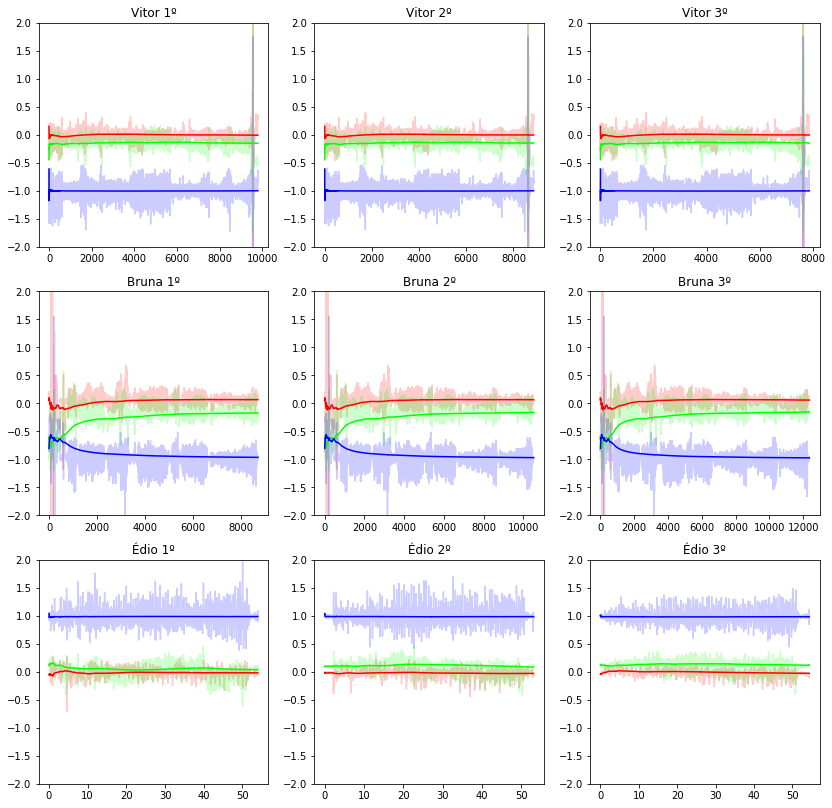

In [9]:
fig, (
    (ax11, ax12, ax13), 
    (ax21, ax22, ax23), 
    (ax31, ax32, ax33)
) = plt.subplots(3, 3, figsize=(14, 14))

plot_file_ios(ax11, "./data/mruv.vitor.1.csv", "Vitor 1º")
plot_file_ios(ax12, "./data/mruv.vitor.2.csv", "Vitor 2º")
plot_file_ios(ax13, "./data/mruv.vitor.3.csv", "Vitor 3º")

plot_file_ios(ax21, "./data/mruv.bruna.1.csv", "Bruna 1º")
plot_file_ios(ax22, "./data/mruv.bruna.2.csv", "Bruna 2º")
plot_file_ios(ax23, "./data/mruv.bruna.3.csv", "Bruna 3º")

plot_file_android(ax31, "./data/mruv.édio.1.csv", "Édio 1º")
plot_file_android(ax32, "./data/mruv.édio.2.csv", "Édio 2º")
plot_file_android(ax33, "./data/mruv.édio.3.csv", "Édio 3º")

In [10]:
for per in ["V", "B", "E"]:
    d["A"][per] = dict()

    for expr in ["P1", "P2", "A1"]:
        d["A"][per][expr] = dict()

d["A"]["V"]["P1"]["s"] = [10, 20, 30]
d["A"]["V"]["P1"]["t"] = avg([[28.06, 39.08, 48.01], [27.23, 39.18, 48.17]])
d["A"]["V"]["P2"]["s"] = [10, 20, 30]
d["A"]["V"]["P2"]["t"] = avg([[27.76, 39.3, 48.11], [27.89, 38.32, 48.03]])
d["A"]["V"]["A1"]["s"] = [5, 10, 15, 20, 25, 30]
d["A"]["V"]["A1"]["t"] = [19.8, 27.71, 34.51, 38.96, 43.73, 47.93]

d["A"]["B"]["P1"]["s"] = [10, 20, 30]
d["A"]["B"]["P1"]["t"] = avg([[27.78, 39.03, 47.6], [27.72, 38.53, 47.48]])
d["A"]["B"]["P2"]["s"] = [10, 20, 30]
d["A"]["B"]["P2"]["t"] = avg([[27.21, 38.36, 46.92], [27.34, 38.6, 47.01]])
d["A"]["B"]["A1"]["s"] = [5, 10, 15, 20, 25, 30]
d["A"]["B"]["A1"]["t"] = [19.84, 27.95, 33.63, 39.2, 43.39, 47.72]

d["A"]["E"]["P1"]["s"] = [10, 20, 30]
d["A"]["E"]["P1"]["t"] = avg([[27.68, 38.91, 46.61], [27.81, 39.09, 47.47]])
d["A"]["E"]["P2"]["s"] = [10, 20, 30]
d["A"]["E"]["P2"]["t"] = avg([[28.92, 38.93, 48.05], [27.51, 39.09, 48.08]])
d["A"]["E"]["A1"]["s"] = [5, 10, 15, 20, 25, 30]
d["A"]["E"]["A1"]["t"] = [19.04, 27.19, 33.48, 38.3, 43.59, 47.85]

for per in d["A"].keys():
    for expr in d["A"][per].keys():
        d["A"][per][expr]["v"] = ualm_v(d["A"][per][expr]["s"], d["A"][per][expr]["t"])
        d["A"][per][expr]["a"] = ualm_a(d["A"][per][expr]["v"], d["A"][per][expr]["t"])

In [11]:
exprs = ["pareado 1", "pareado 2", "alternado"]
htmls = []

for per in ["V", "B", "E"]:
    plt.axis([0, m["A"]["t"][-1]*1.1, 0, m["A"]["s"][-1]*1.1])

    plt.xlabel("t (s)")
    plt.ylabel("s(t) (m)")
    
    plt.plot(m["A"]["t"], m["A"]["s"], color=c["M"]+(0.5,), linestyle="--")

    for expr in ["P1", "P2", "A1"]:
        plt.plot(
            d["A"][per][expr]["t"], d["A"][per][expr]["s"], 
            color=c[per], linestyle="", marker="o"#, marker="$"+expr+"$", markersize=15
        )
        plt.plot(
            m["A"]["t"], [d["A"][per][expr]["a"]*t*t/2 for t in m["A"]["t"]], 
            color=c[per]+(0.2,)
        )
        
    a_plot_html = get_html_from_plot()
        
    
    plt.axis([0, m["A"]["t"][-1]*1.1, 0, m["A"]["v"][-1]*1.1])

    plt.xlabel("t (s)")
    plt.ylabel("v(t) (m/s)")
    
    plt.plot(m["A"]["t"], m["A"]["v"], color=c["M"]+(0.5,), linestyle="--")

    for expr in ["P1", "P2", "A1"]:
        plt.plot(
            d["A"][per][expr]["t"], d["A"][per][expr]["v"], 
            color=c[per], linestyle="", marker="o"#, marker="$"+expr+"$", markersize=15
        )
        plt.plot(
            m["A"]["t"], [d["A"][per][expr]["a"]*t for t in m["A"]["t"]], 
            color=c[per]+(0.2,)
        )
        
    v_plot_html = get_html_from_plot()
    
    htmls.append(center_html(
        a_plot_html + v_plot_html +
        "<div style=\"vertical-align: middle; display: flex; flex-direction: row; " +
        "justify-content: space-around; vertical-align: middle;\">" +
        get_html_table(
            "Aceleração média na passada (m/s²)", 
            [exprs, [d["A"][per][expr]["a"] for expr in d["A"][per]]]
        ) + 
        get_html_table(
            "E.Q.M.s dos cronômetros à vm (%)", 
            [exprs, [
                avg_quad_err(
                    [sqrt(2*s/d["A"][per][expr]["a"]) for s in d["A"][per][expr]["s"]],
                    [t for t in d["A"][per][expr]["t"]]
                ) for expr in d["A"][per].keys()
            ]]
        ) + 
        get_html_table(
            "E.Q.M.s dos cronômetros ao modelo (%)", 
            [exprs, [
                avg_quad_err(
                    [sqrt(2*s/d["A"][per][expr]["a"]) for s in d["A"][per][expr]["s"]],
                    [sqrt(2*s/m["A"]["a"]) for s in d["A"][per][expr]["s"]]
                ) for expr in d["A"][per].keys()
            ]]
        ) +
        "</div>"
    ))

plt.axis([0, m["A"]["t"][-1]*1.1, 0, m["A"]["s"][-1]*1.1])

plt.xlabel("t (s)")
plt.ylabel("v(t) (m)")

plt.plot(m["A"]["t"], m["A"]["s"], color=c["M"]+(0.5,), linestyle="--")
for per in ["V", "B", "E"]:
    for expr in ["P1", "P2", "A1"]:
        plt.plot(
            d["A"][per][expr]["t"], d["A"][per][expr]["s"], 
            color=c[per], linestyle="", marker="o"#, marker="$"+expr+"$", markersize=15
        )
        plt.plot(
            m["A"]["t"], [d["A"][per][expr]["a"]*t*t/2 for t in m["A"]["t"]], 
            color=c[per]+(0.2,)
        )
        
a_plot_html = get_html_from_plot()
        

plt.axis([0, m["A"]["t"][-1]*1.1, 0, m["A"]["v"][-1]*1.1])

plt.xlabel("t (s)")
plt.ylabel("v(t) (m/s)")

plt.plot(m["A"]["t"], m["A"]["v"], color=c["M"]+(0.5,), linestyle="--")
for per in ["V", "B", "E"]:
    for expr in ["P1", "P2", "A1"]:
        plt.plot(
            d["A"][per][expr]["t"], d["A"][per][expr]["v"], 
            color=c[per], linestyle="", marker="o"#, marker="$"+expr+"$", markersize=15
        )
        plt.plot(
            m["A"]["t"], [d["A"][per][expr]["a"]*t for t in m["A"]["t"]], 
            color=c[per]+(0.2,)
        )
        
v_plot_html = get_html_from_plot()
    
htmls.append(center_html(
    a_plot_html + v_plot_html + 
    "<div style=\"vertical-align: middle; display: flex; flex-direction: row; " +
    "justify-content: space-around; vertical-align: middle;\">" +
    get_html_table(
        "Aceleração média na passada (m/s²)",
        [exprs, avg([
            [d["A"][per][expr]["a"] for expr in d["A"][per]]
            for per in d["A"].keys()
        ])]
    ) + 
    get_html_table(
        "Média dos E.Q.M.s dos cronômetros à am (%)", 
        [exprs, avg([[
            avg_quad_err(
                [sqrt(2*s/d["A"][per][expr]["a"]) for s in d["A"][per][expr]["s"]],
                [t for t in d["A"][per][expr]["t"]]
            ) for expr in d["A"][per].keys()]
            for per in d["A"].keys()
        ])]
    ) + 
    get_html_table(
        "Média dos E.Q.M.s dos cronôm. ao modelo (%)", 
        [exprs, avg([[
            avg_quad_err(
                [sqrt(2*s/d["A"][per][expr]["a"]) for s in d["A"][per][expr]["s"]],
                [sqrt(2*s/m["A"]["a"]) for s in d["A"][per][expr]["s"]]
            ) for expr in d["A"][per].keys()]
            for per in d["A"].keys()
        ])]
    ) +
    "</div>"
))
    
tab = widgets.Tab()
tab.children = [widgets.HTML(value=html) for html in htmls]
for i, title in enumerate(["Vitor", "Bruna", "Édio", "Todos"]):
    tab.set_title(i, title)

plt.show()
clear_output()
display(tab)

Tab(children=(HTML(value='<div style="text-align: center"><img style="display: inline;" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAbAAAAGwCAYAAADITjAqAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJzs3Xl0leW5N/7vzjzP2ZkHMgAxDAGCoAwCMWhRQcTT6uH4o9WWHu1ap7V9u%2BpZnrNa19uq73mX79LT1nNk1Z6iRexSq6hQZFQRizRgGIQAEkJ25p152Nnz8/vj6sOTYWcAkj1%2BP2uxgCc7eGdr%2BHrf93Vft05RFAVEREQ%2BJsjTAyAiIroRDDAiIvJJDDAiIvJJDDAiIvJJDDAiIvJJDDAiIvJJDDAiIvJJDDAiIvJJDDAiIvJJDDAiIvJJDDAiIvJJDDAiIvJJDDAiIvJJIZ4ewI1ISUlBfn6%2Bp4dBRERToK6uDu3t7df9eT4ZYPn5%2BaiqqvL0MIiIaAqUl5ff0OdxCZGIiHwSA4yIiHwSA4yIiHwSA4yIiHwSA4yIiHwSA4yIiHwSA4yIiHwSA4yIiHwSA4yIiHwSA4yIiHwSA4yIiHwSA4yIiHwSA4yIiHwSA4yIiHwSA4yIiHwSA4yIiHwSA4yIiHwSA4yIiHwSA4yIiHwSA4yIiHwSA4yIiHwSA4yIiHwSA4yIiHwSA4yIiHyS2wLMbDbj1ltvxfz581FaWoqf//znAIArV65gyZIlKC4uxre%2B9S1YrVZ3DYmIiHyY2wIsPDwchw4dwqlTp1BdXY29e/fi2LFj%2BNnPfoYnn3wSly5dQmJiIl599VV3DYmIKLDs2AGkpAA6nfYjJUWe%2ByC3BZhOp0NMTAwAwGazwWazQafT4dChQ3jwwQcBAFu2bMF7773nriEREQWOHTuARx8FOjqGP%2B/oAL7zHZ8MMbfugTkcDpSVlUGv16OyshKFhYVISEhASEgIACA7OxuNjY3uHBIRUWB4%2BmlgrC0am00%2B7mPcGmDBwcGorq5GQ0MDjh8/jvPnz496jU6nc/m527ZtQ3l5OcrLy2E0Gqd7qERE/qW%2B/uY%2B7oU8UoWYkJCAVatW4dixY%2Bju7obdbgcANDQ0IDMz0%2BXnbN26FVVVVaiqqkJqaqo7h0tE5Ptyc2/u417IbQFmNBrR3d0NABgcHMSBAwdQUlKC1atX4%2B233wYAbN%2B%2BHRs2bHDXkIiIAsevfgWEhbn%2BWGiofNzHhLjrH9Tc3IwtW7bA4XDA6XTim9/8Ju69917ccssteOihh/Bv//ZvWLBgAR577DF3DYmIKHBs3iw///CHwws5kpOBl17SPu5DdIqiKJ4exPUqLy9HVVWVp4dBROSTrFYrQkJCEBTkHb0sbvTvdO8YPRERuc2BAwfwyiuvwOFweHooN4UBRkQUQHp7e3HixAlkZ2cjODjY08O5KQwwIqIA8tlnn0FRFKxYscLTQ7lpDDAiogChzr4WLFiAhIQETw/npjHAiIgCxIkTJ/xm9gW4sYyeiIg864477kBxcbFfzL4AzsCIiAKC0%2BlEUFAQsrOzPT2UKcMAIyLyc729vXjxxRfx9ddfe3ooU4oBRkTk5z777DP09/cjOTlZe2g2e25AU4QBRkTkx3p6eq5VHiYmJspDhwOoqQEMBs8O7iYxwIiI/NiRI0cAYHjlYWurhNjQGZkPYoAREfmp/v5%2BfPnll8PPfdntEmCJiUBUlGcHeJNYRk9E5KdiYmLwyCOPICkpSXvY0gI4ncAYdy/6EgYYEZEfUhQFOp0O%2Bfn52kObDTAagaQkICLCY2ObKlxCJCLyQ3v27MH%2B/fuHP2xpARTFL2ZfAAOMiMjvdHZ24sSJE8OvS7FaZfaVnAyEh3tucFOIAUZE5Gc%2B%2BeQTBAcHY/ny5drD5mb5OSPDM4OaBgwwIiI/0t7ejtOnT6O8vBwxMTHy0GIBOjqAlBQgLMyzA5xCDDAiIj/yySefIDQ0dPTsS6fzq9kXwCpEIiK/smrVKsyePRvR0dHyYHBQZl9paUBoqGcHN8UYYEREfiQ5OXl4z8OmJiA4GEhP99ygpgmXEImI/EBzczPefPNN9Pb2ag9NJqC7W2ZfIf43X/G/r4iIKAAdPnwYBoMBYUOLNBobJbj0es8NbBpxBkZE5OMaGhpw8eJFLFu2DBFqh43%2BfqC3V5YOg4M9O8BpwgAjIvJxhw4dQnR0NG699VbtYWOjFG2kpnpuYNOMAUZE5MOuXr2K2tpaLF%2B%2BXFs%2B7OmRGVhGBhDkv3/N%2B%2B9XRkQUAPR6PVatWoXy8nLtYVOTtItKSfHcwNyARRxERD4sMjISq1at0h50dUn1YX6%2BHF72Y5yBERH5IEVR8N577%2BHKlStDH8reV2SkXJni5xhgREQ%2B6Pz586iurh5%2B7qujQ/oeZmb6/ewLYIAREfkcp9OJw4cPIzU1FXPnzlUfyt5XdDSQkDDxH9LZKRdc%2BjAGGBGRjzlz5gyMRiNWr16NILXK0GiUQMrKmvgPMJuBujq54NKHMcCIiHyIw%2BHAxx9/jIyMDJSUlKgPJYzi4oDY2In/kMZGKa/38e70rEIkIvIxt99%2BO5KTk6FT97laWwG7fXKzr/5%2B6Y%2BYmenz/RF9e/RERAEmODgYixcv1h7YbBJgiYlAVNTEf0BDg3ToSEubvkG6CZcQiYh8xMmTJ1FVVQVFUbSHLS1SPp%2BZOfEf0NkJDAzITM0POnT4/ldARBQAzGYz9u/fj5qaGm3p0GKR4o3kZEBt4jsWPzwjxgAjIvIBn3/%2BOQYHB1FRUaE9bGqS816TmX21tQFWK5Cd7TdnxBhgRERerr%2B/H8eOHUNpaSky1MpBk0mWBPV62dMaj8MBNDdLlWJc3PQP2E0YYEREXu7IkSOw2%2B1Ys2aN9rCxUe75Sk%2Bf%2BA9obpYQy86evkF6AKsQiYi8XHFxMWJjY5GcnCwP%2Bvrkssrs7Ikvq7RYZPkwJUX2v1RtbTIbm2jvzIsxwIiIvFxRURGKioq0B42NQFjY5C6rbGwcvU9mMgEGg8zeJnN2zEtxCZGIyEsZjUYcOHAAFotFe9jVJaXwk7mssr9fXp%2BWNnyfzGCQQ8yTWX70YgwwIiIvdfDgQfztb3%2BDw%2BGQB4oilYcREVI6PxH10PLQoOrqkmDLypp4%2BdHLMcCIiLyQwWBATU0Nli1bhii1w0Z7uzTinUwpvDpTy8zUZmpOp4RaZOTkAtDLMcCIiLyMoig4cOAAYmJisHTpUnnodEo1YUwMEB8//h8wVlCpZ8FycvziLBgDjIjIy3z99de4evUq7rjjDoSFhcnD1lbpeziZUnijcfShZZtNAjAhYXId630AA4yIyMskJCRg0aJFWLhwoTyw2aTnYWKiXFg5Hrtdgio%2Bfvih5aYm2UPzo7NgLKMnIvIyqampuO%2B%2B%2B7QHzc2Tb9jb1CRLiEODymSS/bO0NCA8fOoH7CFum4EZDAasXr0aJSUlKC0txUsvvQQA%2BMUvfoGsrCyUlZWhrKwMe/bscdeQiIi8it1ux1/%2B8hd0dXVpDy0WCZ%2BUlIkPHZvNrl%2Brls37%2BAWWI7ktwEJCQvDCCy/g/PnzOHbsGH7729/i3LlzAIAnn3wS1dXVqK6uxrp169w1JCIiz9mxA8jPlwrB/Hxgxw6cOHECX3zxBTo6OrTXqQeRJxM%2BBoP8eUNnamrZfGamz5fNj%2BS2JcSMjIxrTShjY2NRUlKCxsZGd/3jiYi8x44dwNatsrQHAFevQtm6FW333YcZ3

## ANÁLISE

## INTERPRETAÇÃO

## CRÍTICA

## REGISTRO